## House Prices: 
- Predicting sale price using Advanced Regression Techniques
- House prices are predicted using RandomForest Regressor, Gradient Boosting Regression, Light Gradient Boosting Machine Regressor

<div class="alert alert-block alert-info">
<h1> Table of Contents</h1></div><a class="anchor" id="0.1"></a>

1. [Importing Libraries](#1)
2. [Loading Dataset](#2)
3. [Visualizing the distribution of the dataset](#3)
4. [Target Variable](#4)
5. [Skewness of the Numerical data](#5)
6. [Data Preprocessing](#6)
7. [Missing Value Treatment](#7)
8. [Outlier Detection](#8)
9. [Data Correlation](#9)
10. [Concatinating the datasets](#10)
11. [Applying One Hot Encoding](#11)
12. [Splitting Dataset for model Building](#12) <br>
--- Prediction Models --- <br>
13. [Random Forest Regressor](#13)
14. [Gradient Boosting Regression](#14)
15. [Light Gradient Boosting Machine Regressor](#15)
16. [XGBoost Regressor](#16)
17. [Stacking up all the models](#17)

<div class="alert alert-block alert-info">
<h1>1. Importing Libraries</h1></div><a class="anchor" id="1"></a>

[Back to Table of Contents](#0.1)

In [1]:
#Esentials
import pandas as pd
import numpy as np
import math
import os

# Statistics
from scipy import stats
from scipy.stats import norm, skew

#Visualization
import dabl
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore useless warnings
import warnings
warnings.filterwarnings("ignore")

#Limiting floats output to 2 decimal points
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x)) 

# the below code will show all the columns of the datasets
pd.set_option('max_columns', 82)

# Scikit Learn Librraies for Model building
import sklearn.metrics as metrics
from sklearn.preprocessing import power_transform
from sklearn.metrics import mean_squared_error, r2_score

#!pip install mlxtend
from mlxtend.regressor import StackingCVRegressor
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

#!pip install lightgbm
from lightgbm import LGBMRegressor

#pip install xgboost
from xgboost import XGBRegressor


print(os.getcwd())

F:\BA - Jigsaw\Kaggle\House Prices Advanced Regression Techniques


<div class="alert alert-block alert-info">
<h1>2. Loading Dataset </h1></div> </h1></div><a class="anchor" id="2"></a>

[Back to Table of Contents](#0.1)

In [2]:
X = pd.read_csv("train.csv").set_index("Id")
Y_train = pd.read_csv("test.csv").set_index("Id")
Y_test = pd.read_csv("sample_submission.csv").set_index("Id")

In [3]:
print("The dimension of X(Train) Dataset is:", X.shape)
print(X.duplicated().sum(),'Duplicate rows.')
X.head()

The dimension of X(Train) Dataset is: (1460, 80)
0 Duplicate rows.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("The dimension of Y(Train) Dataset is:", Y_train.shape)
print(Y_train.duplicated().sum(),'Duplicate rows.')
Y_train.head()

The dimension of Y(Train) Dataset is: (1459, 79)
0 Duplicate rows.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.00,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,CBlock,TA,TA,No,Rec,468.00,LwQ,144.00,270.00,882.00,GasA,TA,Y,SBrkr,896,0,0,896,0.00,0.00,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.00,Unf,1.00,730.00,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.00,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.00,TA,TA,CBlock,TA,TA,No,ALQ,923.00,Unf,0.00,406.00,1329.00,GasA,TA,Y,SBrkr,1329,0,0,1329,0.00,0.00,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.00,Unf,1.00,312.00,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.00,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.00,TA,TA,PConc,Gd,TA,No,GLQ,791.00,Unf,0.00,137.00,928.00,GasA,Gd,Y,SBrkr,928,701,0,1629,0.00,0.00,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.00,Fin,2.00,482.00,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.00,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.00,TA,TA,PConc,TA,TA,No,GLQ,602.00,Unf,0.00,324.00,926.00,GasA,Ex,Y,SBrkr,926,678,0,1604,0.00,0.00,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.00,Fin,2.00,470.00,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.00,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.00,Gd,TA,PConc,Gd,TA,No,ALQ,263.00,Unf,0.00,1017.00,1280.00,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.00,0.00,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.00,RFn,2.00,506.00,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
print("The dimension of Y(Test) Dataset is:", Y_test.shape)
print(Y_test.duplicated().sum(),'Duplicate rows.')
Y_test.head()

The dimension of Y(Test) Dataset is: (1459, 1)
21 Duplicate rows.


,SalePrice
Id,
1461,169277.05
1462,187758.39
1463,183583.68
1464,179317.48
1465,150730.08


<div class="alert alert-block alert-info">
<h1>3. Visualizing the distribution of the dataset </h1></div> </h1></div><a class="anchor" id="3"></a>

[Back to Table of Contents](#0.1)

Target looks like regression
Showing only top 10 of 22 continuous features
Showing only top 10 of 45 categorical features


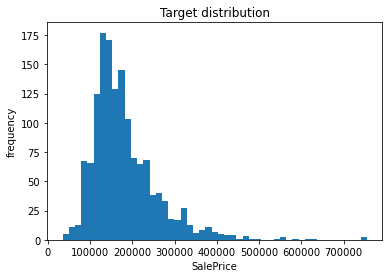

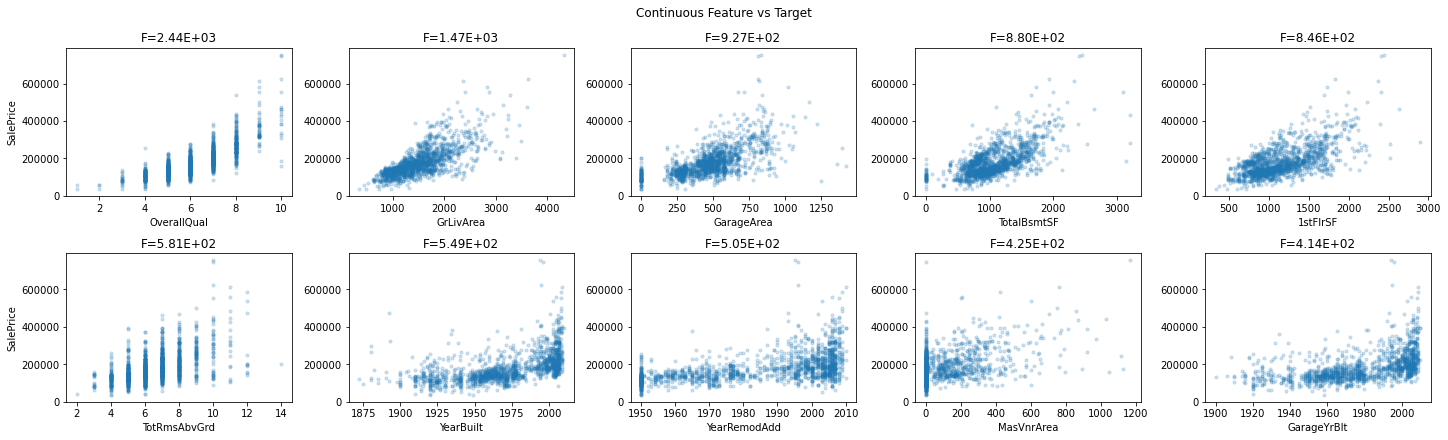

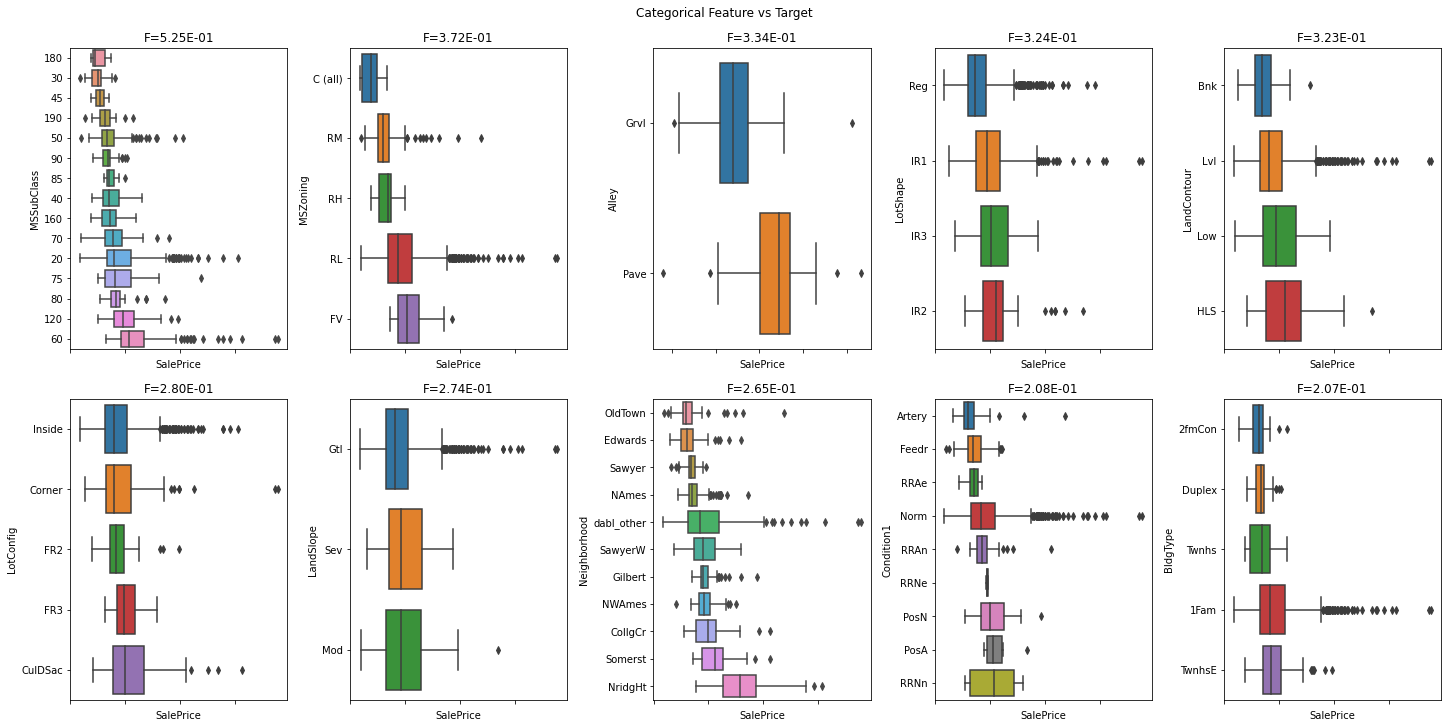

In [6]:
dabl.plot(X, target_col='SalePrice')

<div class="alert alert-block alert-info">
<h1>4. Target Variable </h1></div> </h1></div><a class="anchor" id="4"></a>

[Back to Table of Contents](#0.1)

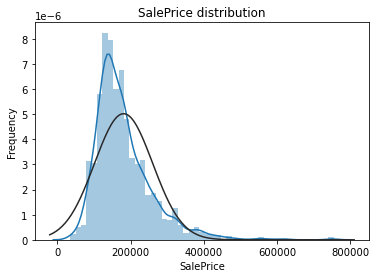

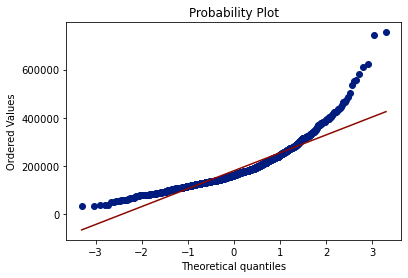

In [7]:
sns.set_color_codes(palette='dark')
sns.distplot(X['SalePrice'] , fit=norm);

#Now plot the distribution
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(X['SalePrice'], plot=plt)
plt.show()

<div class="alert alert-block alert-warning">
<h1>Observation</h1></div> </h1></div><a class="anchor"></a>

- Target is continuous variable so this is a regression problem.
- SalePrice is right skewed.
- SalePrice doesn't follow normal distribution, so before performing regression it has to be transformed.
- As for linear models, target variable should be normally distributed
- Using box-cox transform in target variable

<div class="alert alert-block alert-info">
<h1>5. Skewness of the Numerical data </h1></div> </h1></div><a class="anchor" id="5"></a>

[Back to Table of Contents](#0.1)

Text(0.5, 1.0, 'Skewness in Y dataset')

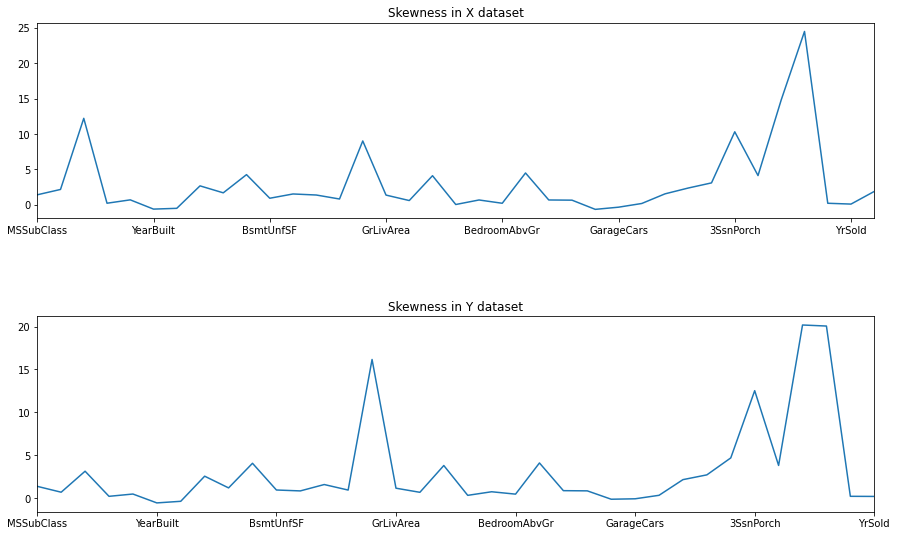

In [8]:
# Visualizing the skewness of the dataset

f4, axes4 = plt.subplots(2, 1, figsize=(15, 9), sharex=False)
f4.subplots_adjust(hspace= .5)

X.skew().plot(ax=axes4[0]).set_title('Skewness in X dataset')
Y_train.skew().plot(ax=axes4[1]).set_title('Skewness in Y dataset')

<div class="alert alert-block alert-warning">
<h1>Observation</h1></div> </h1></div><a class="anchor"></a>

- Few variables are highly skewed.
- Log Transformation reduced the skewness in the data.

<div class="alert alert-block alert-info">
<h1>6. Data Preprocessing </h1></div> </h1></div><a class="anchor" id="6"></a>

[Back to Table of Contents](#0.1)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [10]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 1461 to 2919
Data columns (total 79 columns):
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 

In [11]:
X.describe(percentiles= [.25, .5, .75, .99] )

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.00,1201.00,1460.00,1460.00,1460.00,1460.00,1460.00,1452.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1379.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.90,70.05,10516.83,6.10,5.58,1971.27,1984.87,103.69,443.64,46.55,567.24,1057.43,1162.63,346.99,5.84,1515.46,0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,1978.51,1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,2007.82,180921.20
std,42.30,24.28,9981.26,1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,79442.50
min,20.00,21.00,1300.00,1.00,1.00,1872.00,1950.00,0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,1900.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00,34900.00
25%,20.00,59.00,7553.50,5.00,5.00,1954.00,1967.00,0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,1129.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1961.00,1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,2007.00,129975.00
50%,50.00,69.00,9478.50,6.00,5.00,1973.00,1994.00,0.00,383.50,0.00,477.50,991.50,1087.00,0.00,0.00,1464.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,1980.00,2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00,163000.00
75%,70.00,80.00,11601.50,7.00,6.00,2000.00,2004.00,166.00,712.25,0.00,808.00,1298.25,1391.25,728.00,0.00,1776.75,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00,214000.00
99%,190.00,141.00,37567.64,10.00,9.00,2009.00,2009.00,791.92,1572.41,830.38,1797.05,2155.05,2219.46,1418.92,360.00,3123.48,2.00,1.00,3.00,1.00,5.00,2.00,11.00,2.00,2009.00,3.00,1002.79,505.46,285.82,261.05,168.00,268.05,0.00,700.00,12.00,2010.00,442567.01
max,190.00,313.00,215245.00,10.00,9.00,2010.00,2010.00,1600.00,5644.00,1474.00,2336.00,6110.00,4692.00,2065.00,572.00,5642.00,3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,2010.00,4.00,1418.00,857.00,547.00,552.00,508.00,480.00,738.00,15500.00,12.00,2010.00,755000.00


In [12]:
X.describe(exclude = [np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [13]:
Y_train.describe(percentiles= [.25, .5, .75, .99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.00,1232.00,1459.00,1459.00,1459.00,1459.00,1459.00,1444.00,1458.00,1458.00,1458.00,1458.00,1459.00,1459.00,1459.00,1459.00,1457.00,1457.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1381.00,1458.00,1458.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00
mean,57.38,68.58,9819.16,6.08,5.55,1971.36,1983.66,100.71,439.20,52.62,554.29,1046.12,1156.53,325.97,3.54,1486.05,0.43,0.07,1.57,0.38,2.85,1.04,6.39,0.58,1977.72,1.77,472.77,93.17,48.31,24.24,1.79,17.06,1.74,58.17,6.10,2007.77
std,42.75,22.38,4955.52,1.44,1.11,30.39,21.13,177.63,455.27,176.75,437.26,442.90,398.17,420.61,44.04,485.57,0.53,0.25,0.56,0.50,0.83,0.21,1.51,0.65,26.43,0.78,217.05,127.74,68.88,67.23,20.21,56.61,30.49,630.81,2.72,1.30
min,20.00,21.00,1470.00,1.00,1.00,1879.00,1950.00,0.00,0.00,0.00,0.00,0.00,407.00,0.00,0.00,407.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,1895.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,2006.00
25%,20.00,58.00,7391.00,5.00,5.00,1953.00,1963.00,0.00,0.00,0.00,219.25,784.00,873.50,0.00,0.00,1117.50,0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,1959.00,1.00,318.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00,2007.00
50%,50.00,67.00,9399.00,6.00,5.00,1973.00,1992.00,0.00,350.50,0.00,460.00,988.00,1079.00,0.00,0.00,1432.00,0.00,0.00,2.00,0.00,3.00,1.00,6.00,0.00,1979.00,2.00,480.00,0.00,28.00,0.00,0.00,0.00,0.00,0.00,6.00,2008.00
75%,70.00,80.00,11517.50,7.00,6.00,2001.00,2004.00,164.00,753.50,0.00,797.75,1305.00,1382.50,676.00,0.00,1721.00,1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,2002.00,2.00,576.00,168.00,72.00,0.00,0.00,0.00,0.00,0.00,8.00,2009.00
99%,190.00,130.69,26210.34,9.00,9.00,2008.00,2009.00,736.28,1682.86,896.59,1731.44,2203.44,2363.26,1379.94,0.00,2798.42,2.00,1.00,3.00,1.00,5.00,2.00,11.00,2.00,2008.00,3.00,1040.43,492.52,276.84,264.42,0.00,255.00,0.00,1326.00,12.00,2010.00
max,190.00,200.00,56600.00,10.00,9.00,2010.00,2010.00,1290.00,4010.00,1526.00,2140.00,5095.00,5095.00,1862.00,1064.00,5095.00,3.00,2.00,4.00,2.00,6.00,2.00,15.00,4.00,2207.00,5.00,1488.00,1424.00,742.00,1012.00,360.00,576.00,800.00,17000.00,12.00,2010.00


In [14]:
Y_train.describe(exclude = [np.number])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1459,107,1459,1459,1457,1459,1459,1459,1459,1459,1459,1459,1459,1459,1458,1458,1443,1459,1459,1459,1415,1414,1415,1417,1417,1459,1459,1459,1459,1458,1457,729,1383,1381,1381,1381,1459,3,290,51,1458,1459
unique,5,2,2,4,4,1,5,3,25,9,5,5,7,6,4,13,15,4,4,5,6,4,4,4,6,6,4,5,2,4,4,7,5,6,3,4,5,3,2,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1114,1453,70,934,1311,1457,1081,1396,218,1251,1444,1205,745,1169,1442,510,510,878,892,1256,661,634,1295,951,431,1237,1446,752,1358,1337,757,1357,364,853,625,1293,1328,1301,2,172,46,1258,1204


<div class="alert alert-block alert-info">
<h1>7. Missing Value Treatment </h1></div> </h1></div><a class="anchor" id="7"></a>

[Back to Table of Contents](#0.1)

A sample of 50 data points are taken and observed if missing data is occuring.


<AxesSubplot:>

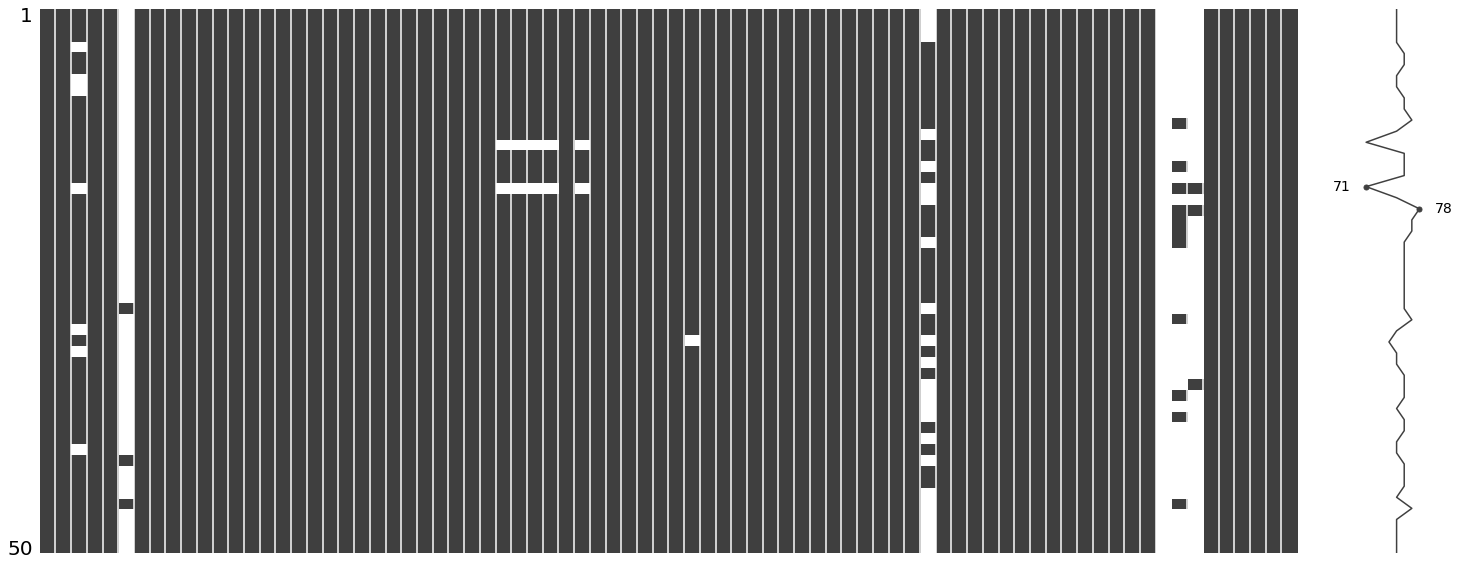

In [15]:
print("A sample of 50 data points are taken and observed if missing data is occuring.")
msno.matrix(X.sample(50))

Correlation of missing values in X dataset


<AxesSubplot:>

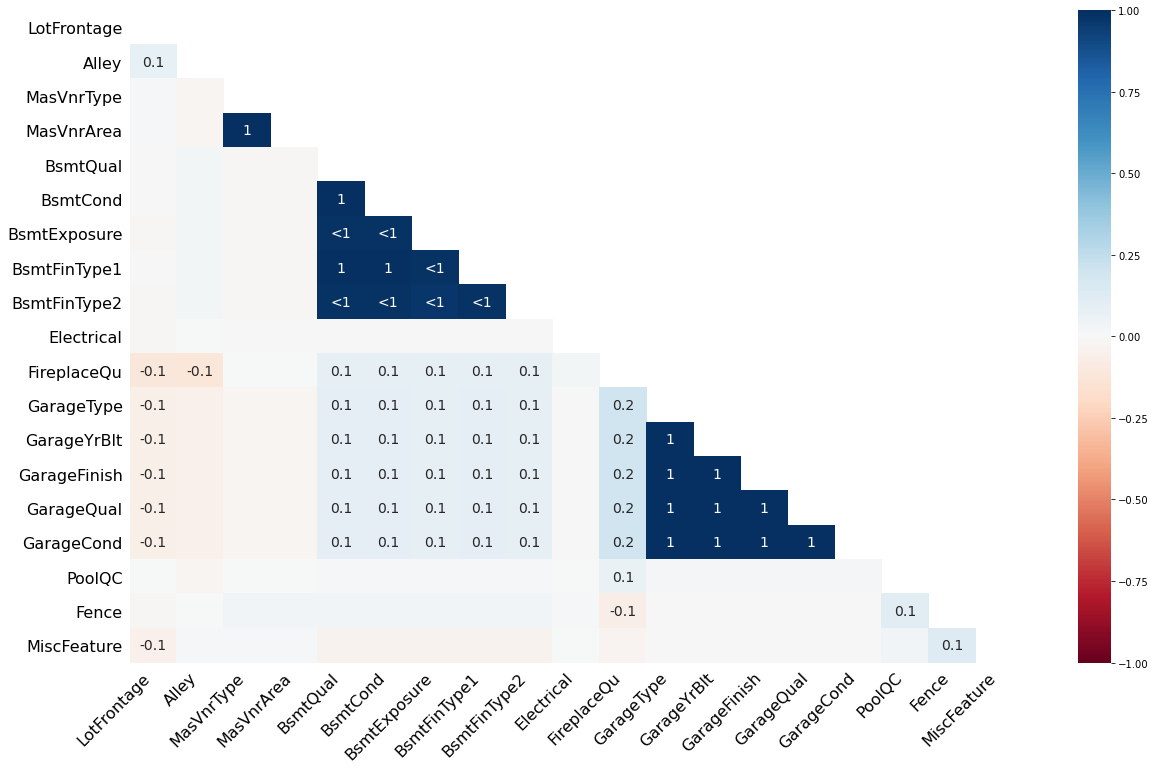

In [16]:
print("Correlation of missing values in X dataset")

msno.heatmap(X)

Correlation of missing values in Y dataset


<AxesSubplot:>

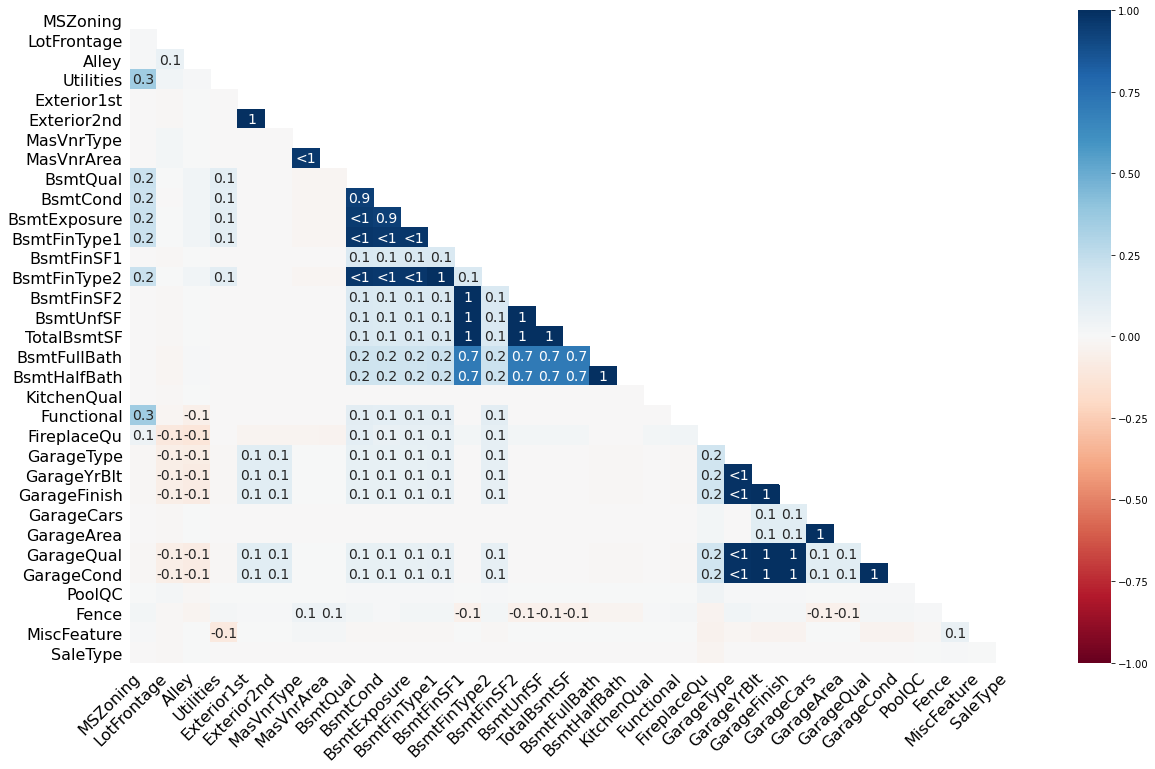

In [17]:
print("Correlation of missing values in Y dataset")

msno.heatmap(Y_train)

<div class="alert alert-block alert-warning">
<h1>Observation</h1></div> </h1></div><a class="anchor"></a>

- Value near -1 : if one variable is present then the other is likely to be missing.
- Value near  0 : there is no dependency between 2 variables.
- Value near -1 : if one variable is present then the other is also likely to be present.

In [18]:
# Return list of columns that contain missing values in X Dataset:

def get_missing_columns(X):
    return X.columns[X.isna().any()].tolist()
print(len(get_missing_columns(X)), "columns have missing data!!")
print("\nColumns names in a list:", get_missing_columns(X) )

19 columns have missing data!!

Columns names in a list: ['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [19]:
# Return list of columns that contain missing values in Y Dataset:

def get_missing_columns(Y_train):
    return Y_train.columns[Y_train.isna().any()].tolist()
print(len(get_missing_columns(Y_train)), "columns have missing data!!")
print("\nColumns names in a list:", get_missing_columns(Y_train))

33 columns have missing data!!

Columns names in a list: ['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


Text(0.5, 1.0, 'Features with missing data in Y Dataset')

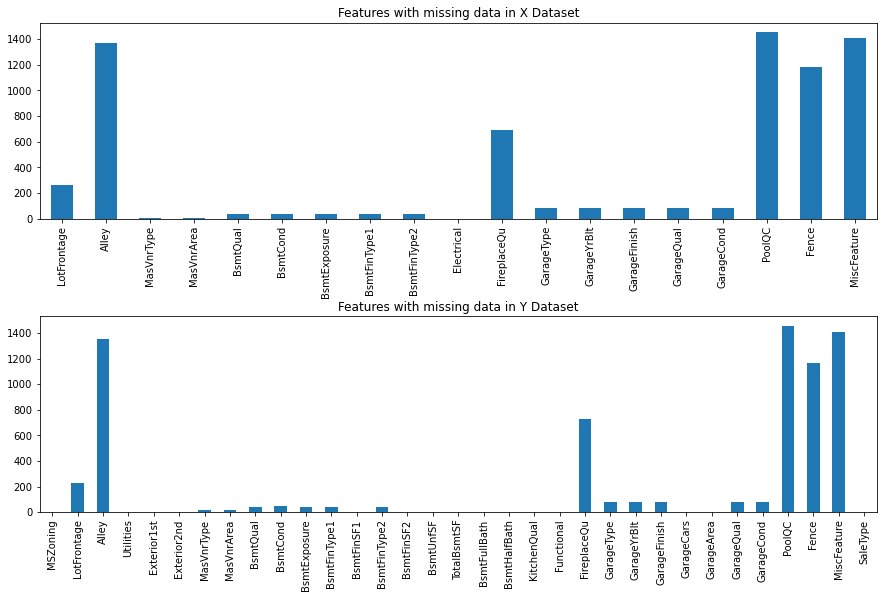

In [20]:
# Graph showing Missing Values in X & Y dataset (in numbers)

X_null = [feature for feature in X.columns if (X[feature].isnull().sum() > 0)]
Y_null = [feature for feature in Y_train.columns if (Y_train[feature].isnull().sum() > 0)]

f, axes = plt.subplots(2, 1, figsize=(15, 9), sharex=False)
f.subplots_adjust(hspace= .5)

X[X_null].isnull().sum().plot(kind='bar', ax=axes[0]).set_title('Features with missing data in X Dataset')
Y_train[Y_null].isnull().sum().plot(kind='bar', ax=axes[1]).set_title('Features with missing data in Y Dataset')

Text(0.5, 1.0, 'PERCENTAGE of missing Features in Y Dataset')

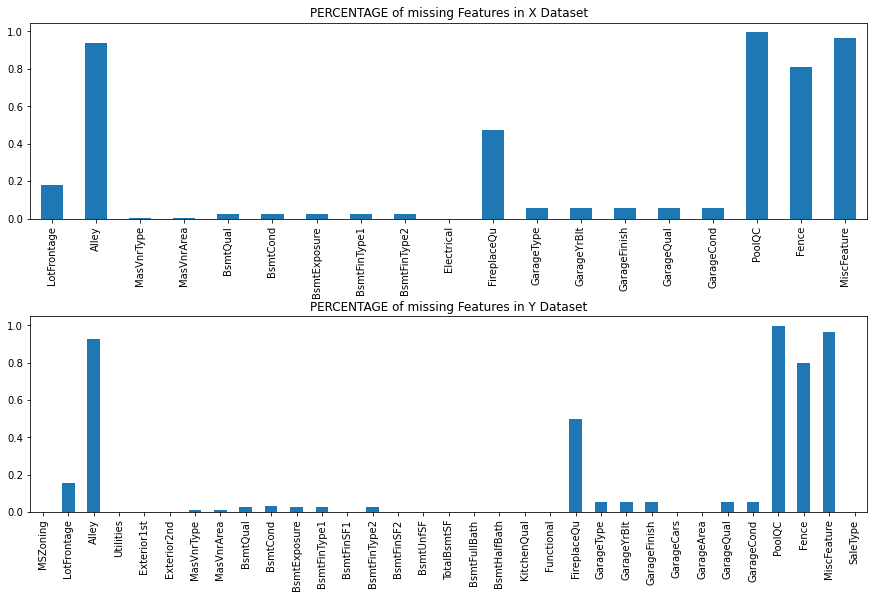

In [21]:
# Graph showing Missing Values in X & Y dataset (in Percentage)

f1, axes1 = plt.subplots(2, 1, figsize=(15, 9), sharex=False)
f1.subplots_adjust(hspace= .5)

X[X_null].isnull().mean().plot(kind='bar', ax=axes1[0]).set_title('PERCENTAGE of missing Features in X Dataset')
Y_train[Y_null].isnull().mean().plot(kind='bar', ax=axes1[1]).set_title('PERCENTAGE of missing Features in Y Dataset')

In [22]:
# table showing percentages of the missing values
print("The attributes in X dataset which has more than 40 % of the missing values")
X_NA = [(c, X[c].isna().mean()*100) for c in X]
X_NA = pd.DataFrame(X_NA, columns=["column_name", "percentage"])
X_NA = X_NA[X_NA.percentage > 40]
X_NA.sort_values("percentage", ascending=False)

The attributes in X dataset which has more than 40 % of the missing values


,column_name,percentage
71,PoolQC,99.52
73,MiscFeature,96.30
5,Alley,93.77
72,Fence,80.75
56,FireplaceQu,47.26


In [23]:
# table showing percentages of the missing values
print("The attributes in Y dataset which has more than 40 % of the missing values")
Y_NA = [(c, Y_train[c].isna().mean()*100) for c in Y_train]
Y_NA = pd.DataFrame(Y_NA, columns=["column_name", "percentage"])
Y_NA = Y_NA[Y_NA.percentage > 40]
Y_NA.sort_values("percentage", ascending=False)

The attributes in Y dataset which has more than 40 % of the missing values


,column_name,percentage
71,PoolQC,99.79
73,MiscFeature,96.50
5,Alley,92.67
72,Fence,80.12
56,FireplaceQu,50.03


<div class="alert alert-block alert-warning">
<h1>Observation</h1></div> </h1></div><a class="anchor"></a>

- 5 attributes in both X & Y dataset have more than 40% of the data missing
- Most of times NA means lack of subject described by attribute, like missing pool, fence, no garage and basement.
- It is advisable to drop these featues. 

In [24]:
# dropping these variables 
drop_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence','FireplaceQu']
X.drop(X[drop_columns], inplace = True, axis=1)
Y_train.drop(Y_train[drop_columns], inplace = True, axis=1)
X.shape, Y_train.shape

((1460, 75), (1459, 74))

### Categorical variables

In [25]:
X_cat = X.select_dtypes(include=['object'])
X_NULL = pd.DataFrame(X_cat.isna().sum(), columns=["Missing"])
X_NULL.sort_values("Missing", ascending=False).head(11)

,Missing
GarageCond,81
GarageQual,81
GarageFinish,81
GarageType,81
BsmtExposure,38
BsmtFinType2,38
BsmtCond,37
BsmtFinType1,37
BsmtQual,37
MasVnrType,8


In [26]:
Y_cat = Y_train.select_dtypes(include=['object'])
Y_NULL = pd.DataFrame(Y_cat.isna().sum(), columns=["Missing"])
Y_NULL.sort_values("Missing", ascending=False).head(17)

,Missing
GarageCond,78
GarageQual,78
GarageFinish,78
GarageType,76
BsmtCond,45
BsmtExposure,44
BsmtQual,44
BsmtFinType1,42
BsmtFinType2,42
MasVnrType,16


## Fill missing values for categorical column (using its own most frequent value)

In [27]:
X_col = ['GarageCond','GarageQual','GarageFinish','GarageType','BsmtExposure','BsmtFinType2','BsmtCond','BsmtFinType1','BsmtQual','MasVnrType','Electrical']
X[X_col] = X[X_col].fillna(X.mode().iloc[0])

Y_col = ['GarageCond','GarageQual','GarageFinish','GarageType', 'BsmtCond','BsmtExposure', 'BsmtQual', 'BsmtFinType1','BsmtFinType2','MasVnrType','MSZoning','Functional','Utilities','KitchenQual','Exterior1st','Exterior2nd','SaleType']
Y_train[Y_col] = Y_train[Y_col].fillna(Y_train.mode().iloc[0])

### Numerical Variables

In [28]:
X_num = X.select_dtypes(exclude=['object'])
X_NULL_num = pd.DataFrame(X_num.isna().sum(), columns=["Missing"])
X_NULL_num.sort_values("Missing", ascending=False).head(3)

,Missing
LotFrontage,259
GarageYrBlt,81
MasVnrArea,8


In [29]:
Y_num = Y_train.select_dtypes(exclude=['object'])
Y_NULL_num = pd.DataFrame(Y_num.isna().sum(), columns=["Missing"])
Y_NULL_num.sort_values("Missing", ascending=False).head(11)

,Missing
LotFrontage,227
GarageYrBlt,78
MasVnrArea,15
BsmtHalfBath,2
BsmtFullBath,2
TotalBsmtSF,1
GarageCars,1
BsmtFinSF1,1
BsmtFinSF2,1
BsmtUnfSF,1


## Fill missing values for numerical column (with respective mean value)

In [30]:
X_col1 = ['LotFrontage','GarageYrBlt','MasVnrArea']
X[X_col1] = X[X_col1].fillna(X.mean().iloc[0])

Y_col1 = ['LotFrontage','GarageYrBlt','MasVnrArea','BsmtHalfBath','BsmtFullBath','TotalBsmtSF','GarageCars','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','GarageArea']
Y_train[Y_col1] = Y_train[Y_col1].fillna(Y_train.mean().iloc[0])

<div class="alert alert-block alert-info">
<h1>8. Outlier Detection</h1></div> </h1></div><a class="anchor" id="8"></a>

[Back to Table of Contents](#0.1)

In [31]:
#X Dataset
outliers_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

for feature in outliers_features:
    IQR = X[feature].quantile(0.75) - X[feature].quantile(0.25)
    lower_boundary = X[feature].quantile(0.25) - (IQR*3)
    upper_boundary = X[feature].quantile(0.75) + (IQR*3)
    print(feature, lower_boundary, upper_boundary)
    
for feature in outliers_features:
    IQR = X[feature].quantile(0.75) - X[feature].quantile(0.25)
    lower_boundary = X[feature].quantile(0.25) - (IQR*3)
    upper_boundary = X[feature].quantile(0.75) + (IQR*3)
    X.loc[X[feature]<=lower_boundary, feature] = lower_boundary
    X.loc[X[feature]>=upper_boundary, feature] = upper_boundary
    
X[outliers_features].describe()    

MSSubClass -130.0 220.0
LotFrontage -9.410958904109577 145.3082191780822
LotArea -4590.5 23745.5
MasVnrArea -492.75 657.0
BsmtFinSF1 -2136.75 2849.0
BsmtUnfSF -1532.0 2563.0
TotalBsmtSF -711.75 2805.75
1stFlrSF -645.75 2919.0
2ndFlrSF -2184.0 2912.0
GrLivArea -812.25 3718.5
GarageArea -390.0 1300.5
WoodDeckSF -504.0 672.0
OpenPorchSF -204.0 272.0
EnclosedPorch 0.0 0.0


,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
count,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00,1460.00
mean,56.90,67.38,9850.71,98.92,441.73,567.24,1054.20,1161.05,346.99,1512.56,472.80,94.04,45.67,0.00
std,42.30,20.42,4152.36,160.00,439.83,441.87,416.30,376.37,436.53,509.44,213.07,124.26,61.38,0.00
min,20.00,21.00,1300.00,0.00,0.00,0.00,0.00,334.00,0.00,334.00,0.00,0.00,0.00,0.00
25%,20.00,56.90,7553.50,0.00,0.00,223.00,795.75,882.00,0.00,1129.50,334.50,0.00,0.00,0.00
50%,50.00,63.00,9478.50,0.00,383.50,477.50,991.50,1087.00,0.00,1464.00,480.00,0.00,25.00,0.00
75%,70.00,79.00,11601.50,164.25,712.25,808.00,1298.25,1391.25,728.00,1776.75,576.00,168.00,68.00,0.00
max,190.00,145.31,23745.50,657.00,2849.00,2336.00,2805.75,2919.00,2065.00,3718.50,1300.50,672.00,272.00,0.00


In [32]:
# Y Dataset
outliers_features = ['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch']

for feature in outliers_features:
    IQR = Y_train[feature].quantile(0.75) - Y_train[feature].quantile(0.25)
    lower_boundary = Y_train[feature].quantile(0.25) - (IQR*3)
    upper_boundary = Y_train[feature].quantile(0.75) + (IQR*3)
    print(feature, lower_boundary, upper_boundary)
    
for feature in outliers_features:
    IQR = Y_train[feature].quantile(0.75) - Y_train[feature].quantile(0.25)
    lower_boundary = Y_train[feature].quantile(0.25) - (IQR*3)
    upper_boundary = Y_train[feature].quantile(0.75) + (IQR*3)
    Y_train.loc[Y_train[feature]<=lower_boundary, feature] = lower_boundary
    Y_train.loc[Y_train[feature]>=upper_boundary, feature] = upper_boundary
    
Y_train[outliers_features].describe()    

MSSubClass -130.0 220.0
LotFrontage -4.486634681288564 139.86497601096642
LotArea -4988.5 23897.0
MasVnrArea -486.0 648.0
BsmtFinSF1 -2256.0 3008.0
BsmtUnfSF -1516.5 2533.0
TotalBsmtSF -776.0 2864.0
1stFlrSF -653.5 2909.5
2ndFlrSF -2028.0 2704.0
GrLivArea -693.0 3531.5
GarageArea -458.0 1351.5
WoodDeckSF -504.0 672.0
OpenPorchSF -216.0 288.0
EnclosedPorch 0.0 0.0


,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch
count,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00,1459.00
mean,57.38,66.71,9650.27,96.22,438.26,553.95,1043.91,1154.41,325.97,1484.68,472.39,92.50,47.23,0.00
std,42.75,20.37,4031.94,158.69,450.56,437.30,433.26,383.72,420.61,477.95,216.84,122.98,62.93,0.00
min,20.00,21.00,1470.00,0.00,0.00,0.00,0.00,407.00,0.00,407.00,0.00,0.00,0.00,0.00
25%,20.00,57.38,7391.00,0.00,0.00,219.00,784.00,873.50,0.00,1117.50,317.50,0.00,0.00,0.00
50%,50.00,63.00,9399.00,0.00,350.00,460.00,988.00,1079.00,0.00,1432.00,480.00,0.00,28.00,0.00
75%,70.00,78.00,11517.50,162.00,752.00,797.50,1304.00,1382.50,676.00,1721.00,576.00,168.00,72.00,0.00
max,190.00,139.86,23897.00,648.00,3008.00,2140.00,2864.00,2909.50,1862.00,3531.50,1351.50,672.00,288.00,0.00


<div class="alert alert-block alert-info">
<h1>9. Data Correlation</h1></div> </h1></div><a class="anchor" id="9"></a>

[Back to Table of Contents](#0.1)

<AxesSubplot:>

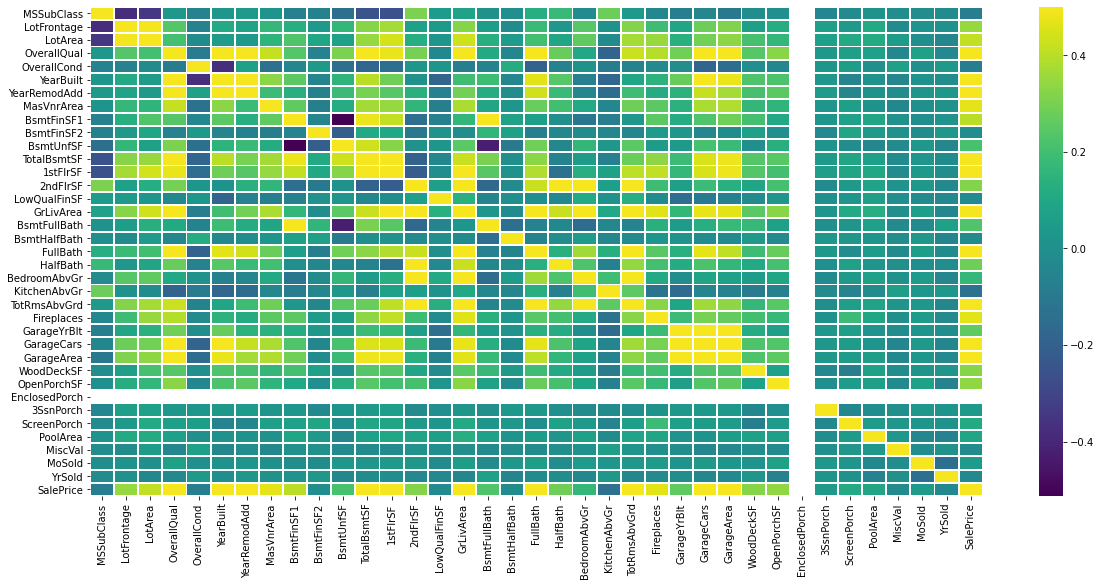

In [33]:
corr_plot = X.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr_plot, vmax= 0.5, center=0 ,cmap= 'viridis' ,linewidths= .9 ,linecolor='white')

In [34]:
corr_features = corr_plot.index[abs(corr_plot['SalePrice']) < 0.3]
corr_features

Index(['MSSubClass', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'GarageYrBlt', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

<div class="alert alert-block alert-warning">
<h1>Observation</h1></div> </h1></div><a class="anchor"></a>

* Below features do not have good correlation with the target variable. <br>
   -- 'MSSubClass', 'LotArea', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'
* It is advisable to drop these variables before modeling   

In [35]:
X.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'EnclosedPorch' ,'MiscVal', 'MoSold', 'YrSold'], axis=1, inplace=True)
Y_train.drop(['BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'KitchenAbvGr', 'KitchenAbvGr', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'EnclosedPorch' ,'MiscVal', 'MoSold', 'YrSold'], axis=1, inplace=True)
X.shape, Y_train.shape

((1460, 63), (1459, 62))

<div class="alert alert-block alert-info">
<h1>10. Concatinating the datasets</h1></div> </h1></div><a class="anchor" id="10"></a>

[Back to Table of Contents](#0.1)

In [36]:
Y = pd.concat([Y_train, Y_test], axis=1)
HP = pd.concat([X,Y], axis=0)
print('Dimension of HP dataset is',HP.shape)
HP.head()

Dimension of HP dataset is (2919, 63)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60.00,RL,65.00,8450.00,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706.00,Unf,150.00,856.00,GasA,Ex,Y,SBrkr,856.00,854.00,1710.00,1.00,2,3,Gd,8,Typ,0,Attchd,2003.00,RFn,2.00,548.00,TA,TA,Y,0.00,61.00,WD,Normal,208500.00
2,20.00,RL,80.00,9600.00,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.00,Unf,284.00,1262.00,GasA,Ex,Y,SBrkr,1262.00,0.00,1262.00,0.00,2,3,TA,6,Typ,1,Attchd,1976.00,RFn,2.00,460.00,TA,TA,Y,298.00,0.00,WD,Normal,181500.00
3,60.00,RL,68.00,11250.00,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.00,Unf,434.00,920.00,GasA,Ex,Y,SBrkr,920.00,866.00,1786.00,1.00,2,3,Gd,6,Typ,1,Attchd,2001.00,RFn,2.00,608.00,TA,TA,Y,0.00,42.00,WD,Normal,223500.00
4,70.00,RL,60.00,9550.00,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216.00,Unf,540.00,756.00,GasA,Gd,Y,SBrkr,961.00,756.00,1717.00,1.00,1,3,Gd,7,Typ,1,Detchd,1998.00,Unf,3.00,642.00,TA,TA,Y,0.00,35.00,WD,Abnorml,140000.00
5,60.00,RL,84.00,14260.00,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655.00,Unf,490.00,1145.00,GasA,Ex,Y,SBrkr,1145.00,1053.00,2198.00,1.00,2,4,Gd,9,Typ,1,Attchd,2000.00,RFn,3.00,836.00,TA,TA,Y,192.00,84.00,WD,Normal,250000.00


<div class="alert alert-block alert-info">
<h1>11. Applying One Hot Encoding</h1></div> </h1></div><a class="anchor" id="11"></a>

[Back to Table of Contents](#0.1)

In [37]:
HP = pd.get_dummies(HP)
print('Dimension of HP dataset is',HP.shape)
HP.head()

Dimension of HP dataset is (2919, 259)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60.00,65.00,8450.00,7,5,2003,2003,196.00,706.00,150.00,856.00,856.00,854.00,1710.00,1.00,2,3,8,0,2003.00,2.00,548.00,0.00,61.00,208500.00,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,20.00,80.00,9600.00,6,8,1976,1976,0.00,978.00,284.00,1262.00,1262.00,0.00,1262.00,0.00,2,3,6,1,1976.00,2.00,460.00,298.00,0.00,181500.00,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,60.00,68.00,11250.00,7,5,2001,2002,162.00,486.00,434.00,920.00,920.00,866.00,1786.00,1.00,2,3,6,1,2001.00,2.00,608.00,0.00,42.00,223500.00,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,70.00,60.00,9550.00,7,5,1915,1970,0.00,216.00,540.00,756.00,961.00,756.00,1717.00,1.00,1,3,7,1,1998.00,3.00,642.00,0.00,35.00,140000.00,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,60.00,84.00,14260.00,8,5,2000,2000,350.00,655.00,490.00,1145.00,1145.00,1053.00,2198.00,1.00,2,4,9,1,2000.00,3.00,836.00,192.00,84.00,250000.00,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [38]:
# Remove any duplicated column names
HP = HP.loc[:,~HP.columns.duplicated()]

In [39]:
#Log Transforming the dataset

cols_skew = [col for col in HP if '_2num' in col or '_' not in col]
HP[cols_skew].skew().sort_values()
cols_unskew = HP[cols_skew].columns[abs(HP[cols_skew].skew()) > 1]
for col in cols_unskew:
    HP[col] = np.log1p(HP[col])
HP.head()    

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,...,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,4.11,65.00,8450.00,7,5,2003,2003,5.28,706.00,150.00,856.00,856.00,854.00,1710.00,0.69,2,3,8,0,7.60,1.10,548.00,0.00,4.13,12.25,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3.04,80.00,9600.00,6,8,1976,1976,0.00,978.00,284.00,1262.00,1262.00,0.00,1262.00,0.00,2,3,6,1,7.59,1.10,460.00,5.70,0.00,12.11,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4.11,68.00,11250.00,7,5,2001,2002,5.09,486.00,434.00,920.00,920.00,866.00,1786.00,0.69,2,3,6,1,7.60,1.10,608.00,0.00,3.76,12.32,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,4.26,60.00,9550.00,7,5,1915,1970,0.00,216.00,540.00,756.00,961.00,756.00,1717.00,0.69,1,3,7,1,7.60,1.39,642.00,0.00,3.58,11.85,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
5,4.11,84.00,14260.00,8,5,2000,2000,5.86,655.00,490.00,1145.00,1145.00,1053.00,2198.00,0.69,2,4,9,1,7.60,1.39,836.00,5.26,4.44,12.43,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


<div class="alert alert-block alert-info">
<h1>12. Splitting Dataset for model Building</h1></div> </h1></div><a class="anchor" id="12"></a>

[Back to Table of Contents](#0.1)

In [40]:
X = HP.iloc[:1460,:]
Y = HP.iloc[:1459,:]

X_train = X.drop('SalePrice', axis=1) #fit
X_test = X['SalePrice']               #fit         
y_train = Y.drop('SalePrice', axis=1) #predict
y_test = Y['SalePrice']               #compare


print("The dimension of X_train is:", X_train.shape)
print("The dimension of X_test is:", X_test.shape)
print("The dimension of Y_train is:", y_train.shape)
print("The dimension of Y_test is:", y_test.shape)

The dimension of X_train is: (1460, 258)
The dimension of X_test is: (1460,)
The dimension of Y_train is: (1459, 258)
The dimension of Y_test is: (1459,)


<div class="alert alert-block alert-info">
<h1>13. Random Forest Regressor</h1></div> </h1></div><a class="anchor" id="13"></a>

[Back to Table of Contents](#0.1)

In [41]:
reg = RandomForestRegressor(n_estimators= 700,
                          max_depth= 20,
                          min_samples_split= 15,
                          min_samples_leaf= 1,
                          max_features= 'auto',
                          oob_score = True,
                          random_state = 200)

reg.fit(X_train, X_test)
RFR_y_pred = reg.predict(y_train)

print('The Out-of-bag score (oob) for Random Forest Regressor Model is',round((reg.oob_score_),2))
print('Root Mean Squared error: ' + str(math.sqrt(metrics.mean_squared_error(y_test, RFR_y_pred))))
print('R2 score: ', round(r2_score(y_test, RFR_y_pred),2))

The Out-of-bag score (oob) for Random Forest Regressor Model is 0.87
Root Mean Squared error: 0.08242865274358176
R2 score:  0.96


<div class="alert alert-block alert-info">
<h1>14. Gradient Boosting Regression</h1></div> </h1></div><a class="anchor" id="14"></a>

[Back to Table of Contents](#0.1)

In [42]:
GBoost = GradientBoostingRegressor(n_estimators= 500,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=200)

GBoost.fit(X_train, X_test)
GBoost_y_pred = GBoost.predict(y_train)

print('Root Mean Squared error: ' + str(math.sqrt(metrics.mean_squared_error(y_test, GBoost_y_pred))))
print('R2 score: ', round(r2_score(y_test, GBoost_y_pred),2))

Root Mean Squared error: 0.11829646474191997
R2 score:  0.91


<div class="alert alert-block alert-info">
<h1>15. Light Gradient Boosting Machine Regressor </h1></div> </h1></div><a class="anchor" id="15"></a>

[Back to Table of Contents](#0.1)

In [43]:
lgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators= 100,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=200)

lgbm.fit(X_train, X_test)
lgbm_y_pred = lgbm.predict(y_train)

print('Root Mean Squared error: ' + str(math.sqrt(metrics.mean_squared_error(y_test, lgbm_y_pred))))
print('R2 score: ', round(r2_score(y_test, lgbm_y_pred),2))

Root Mean Squared error: 0.24096105938320508
R2 score:  0.64


<div class="alert alert-block alert-info">
<h1>16. XGBoost Regressor </h1></div> </h1></div><a class="anchor" id="16"></a>

[Back to Table of Contents](#0.1)

In [44]:
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators= 500,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:linear',
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=200)

xgboost.fit(X_train, X_test)
xgboost_y_pred = xgboost.predict(y_train)

print('Root Mean Squared error: ' + str(math.sqrt(metrics.mean_squared_error(y_test, xgboost_y_pred))))
print('R2 score: ', round(r2_score(y_test, xgboost_y_pred),2))

[18:12:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Squared error: 0.152183048761395
R2 score:  0.85


<div class="alert alert-block alert-info">
<h1>17. Stacking up all the models </h1></div> </h1></div><a class="anchor" id="17"></a>

[Back to Table of Contents](#0.1)

In [45]:
stack_gen = StackingCVRegressor(regressors=(reg, GBoost, lgbm, xgboost),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

stack_gen.fit(X_train, X_test)
stack_gen_y_pred = xgboost.predict(y_train)

print('Root Mean Squared error: ' + str(math.sqrt(metrics.mean_squared_error(y_test, stack_gen_y_pred))))

[18:15:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:16:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[18:16:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:17

<div class="alert alert-block alert-warning">
<h1>Final Observation</h1></div> </h1></div><a class="anchor"></a>

* 3 Models are built on the final dataset:
    - RandomForest Regressor : RMSE = 88874.12 | R2 score = 2.81
    - Gradient Boosting Regressior : RMSE = 93297.90 | R2 score = -7.11
    - Light Gradient Boosting Machine Regressor : RMSE = 88302.01 | R2 score = 4.06
* A combination of all the 2 models is giving: RMSE = 86360.01 | R2 score = 8.23
* The combination model is giving the best score. Hence using the same for prediction.

In [46]:
Predict = (RFR_y_pred*.2 + GBoost_y_pred*.2 + lgbm_y_pred*.2 + xgboost_y_pred*.2 + stack_gen_y_pred*.2)

print('Root Mean Squared error: ' + str(math.sqrt(metrics.mean_squared_error(y_test, Predict))))
print('R2 score: ', round(r2_score(y_test, Predict),2))

Root Mean Squared error: 0.1335168009419476
R2 score:  0.89


In [48]:
# Final Predicted Dataset to be uploaded:
sub = pd.DataFrame()
sub['SalePrice'] = np.expm1(Predict)

sub.to_csv('submission.csv', index=False)

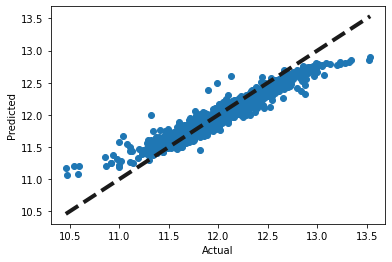

<Figure size 432x288 with 0 Axes>

In [71]:
fig, ax = plt.subplots()
ax.scatter(y_test, Predict)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()
plt.savefig('Actual VS Predicted.png')

___